In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os, sys, gc
import json
import csv
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import shutil


In [2]:
def hist_guesses(guess_array, num_c=10):
    out = np.empty((len(guess_array), num_c))
    
    for i, guess_list in enumerate(guess_array):
        out[i] = np.bincount(guess_list, minlength=num_c)
        
    return out

# define working directory and show context
w_dir = os.getcwd()
print(w_dir)
files = os.listdir()
print(files)

#image source directory
test_image_dir = w_dir

# cifar10 identifiers
ground_labels = np.int_(np.load('test_set_cifar_labels.npy'))
ordered_filenames = np.load('decoded_test_filename_order.npy')
categories = ['plane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# our data
master_guess_array = np.load('test_set_master_guess_array.npy')
master_guess_hist = hist_guesses(master_guess_array)

/home/battleday/Academic/Berkeley/Superman/local/cifar10-human-experiments/sparsity
['example_histograms.png', 'jumbo_jet_s_001595.png', '.ipynb_checkpoints', 'decoded_test_filename_order.npy', 'test_set_master_guess_array.npy', 'banana_boat_s_001539.png', 'test_set_cifar_labels.npy', 'flightless_bird_s_000604.png', 'Sparsity.ipynb', 'domestic_cat_s_000167.png']


In [3]:
n=3
num_samples = ordered_filenames.shape[0]

inds = np.arange(n, num_samples-n)
filenames = np.delete(ordered_filenames, inds, axis=0)
filenames = ordered_filenames
print(filenames.shape)
hists = np.delete(master_guess_hist, inds, axis=0)
guesses = np.delete(master_guess_array, inds, axis=0)
guesses = master_guess_array
gt = np.delete(ground_labels, inds, axis=0)
gt=ground_labels
print(filenames[0], hists[0], gt[0])

(10000,)
domestic_cat_s_000907.png [  0.   1.   1.  48.   0.   1.   0.   0.   0.   0.] 3


jumbo_jet_s_001595.png
domestic_cat_s_000167.png
banana_boat_s_001539.png
flightless_bird_s_000604.png
yes


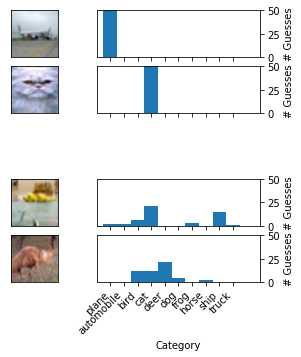

In [4]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(5, 5)
# worst bird: 7590
#worst boat: 3357

#best cat: 4106
#best plane:7103
examples = [7103, 4106, 3357, 7590]
im_start = [0, 1, 3, 4]
for i in np.arange(4):
    #  scores has best and worst
    
    #ax_l = plt.subplot(gs[im_start[i]+1:im_start[i] + 2, 0:5]) # size of im
    
    #ax_l.hist(gt[i], bins = np.arange(11) - 0.5)
    #ax_l.set_xlim([-1, 11])
    #ax_l.xaxis.set_ticks(np.arange(10))
    
    im = mpimg.imread(test_image_dir + '/' + filenames[examples[i]])
    shutil.move(test_image_dir + '/' + filenames[examples[i]], w_dir + '/' + filenames[examples[i]])
    print(filenames[examples[i]])
    ax_c = plt.subplot(gs[im_start[i], :2])
    ax_c.imshow(im)
    ax_c.set_xticks([])
    ax_c.set_yticks([])
    
    ax_r = plt.subplot(gs[im_start[i], 2:])
    ax_r.hist(guesses[examples[i]], bins = np.arange(11) - 0.5)
    ax_r.set_xlim([-1, 11])
    ax_r.set_ylim([0, 50])
    ax_r.xaxis.set_ticks(np.arange(10))
    ax_r.set_ylabel('# Guesses')
    ax_r.yaxis.set_label_position("right")
    ax_r.set_xticklabels([])
    
    ax_r.yaxis.tick_right()
    
    if ax_r.is_last_row():
        print('yes')
        ax_r.set_xlabel('Category') # set to count
        ax_r.xaxis.set_ticks(np.arange(10))
        ax_r.set_xticklabels(categories) # set to labels
        plt.xticks(rotation = 45, ha='right')
    
plt.savefig(os.path.join(w_dir, 'example_histograms.png'), bbox_inches="tight") 
  

In [ ]:
# for ICLR 2019 submission push

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(5, 5)
# worst bird: 7590
#worst boat: 3357

#best cat: 4106
#best plane:7103
examples = [7103, 4106, 3357, 7590]
im_start = [0, 1, 3, 4]
for i in np.arange(4):
    
    im = mpimg.imread(test_image_dir + '/' + filenames[examples[i]])
    shutil.move(test_image_dir + '/' + filenames[examples[i]], w_dir + '/' + filenames[examples[i]])
    print(filenames[examples[i]])
    ax_c = plt.subplot(gs[im_start[i], :2])
    ax_c.imshow(im)
    ax_c.set_xticks([])
    ax_c.set_yticks([])
    
    ax_r = plt.subplot(gs[im_start[i], 2:])
    ax_r.hist(guesses[examples[i]], bins = np.arange(11) - 0.5, rwidth=0.8, color='black')
    ax_r.set_xlim([-1, 11])
    ax_r.set_ylim([0, 50])
    ax_r.xaxis.set_ticks(np.arange(10))
#     ax_r.set_ylabel('# Guesses')
    ax_r.yaxis.set_label_position("right")
    ax_r.set_xticklabels([])
    
    ax_r.yaxis.tick_right()
    
    if ax_r.is_last_row():
        print('yes')
        ax_r.set_xlabel('Category') # set to count
        ax_r.xaxis.set_ticks(np.arange(10))
        ax_r.set_xticklabels(categories) # set to labels
        plt.xticks(rotation = 45, ha='right')
    
# plt.savefig(os.path.join(w_dir, 'example_histograms.png'), bbox_inches="tight")
# plt.savefig(os.path.join(w_dir, 'example_histograms.pdf'), bbox_inches="tight")